### Lending Club Case Study

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

#### Objective of this excercise is to 
> - Identify categories of loan applicants who are potential defaulters, backed by stats

#### ____________________________________________________________________________________________

In [6]:
# import libaries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sn

In [8]:
## import loan data set
loanData = pd.read_csv("D:\AIML\Python\loan.csv", low_memory=False)

In [9]:
pd.set_option('display.max_rows', 200)

----------------------------------------
### Total number of columns : 111
----------------------------------------

In [10]:
loanData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


### Total number of rows : 39717

In [11]:
# total number of rows
len(loanData)

39717

## Drop columns with all NULL values

In [12]:
naColumns = loanData.columns[loanData.isnull().all()]

In [13]:
len(naColumns)

54

In [14]:
dataset1 = loanData.drop(naColumns, axis=1)

## Dataset columns after column drops : 57

In [15]:
len(dataset1.columns)

57

## Charged Off applicants : 5627

In [16]:
dataset1.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

<Axes: xlabel='loan_status'>

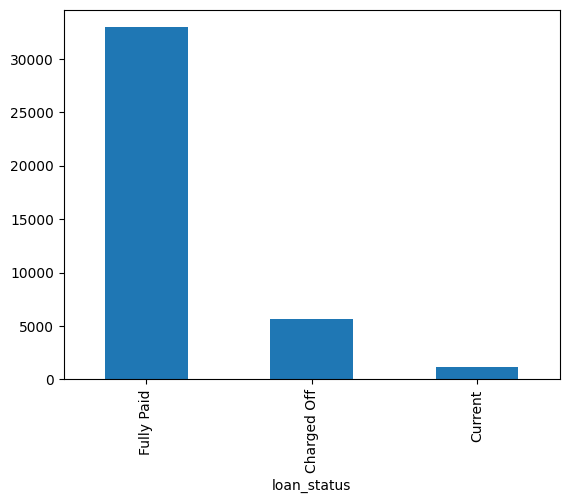

In [17]:
dataset1.loan_status.value_counts().plot.bar()

###  Defaulted applicants dataset

In [18]:
defaulted = dataset1[dataset1.loan_status == "Charged Off"]

In [19]:
defaulted

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,NaN,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,NaN,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36 months,12.80%,84.00,D,D4,...,NaN,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39668,118533,117783,2500,2500,825.0,36 months,9.64%,80.26,B,B4,...,NaN,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39669,118523,118519,6500,6500,225.0,36 months,15.01%,225.37,F,F1,...,NaN,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39678,113179,113093,1000,1000,950.0,36 months,10.59%,32.55,C,C2,...,NaN,Oct-09,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0


## Term vs Defaulters analysis

In [20]:
defaulted.term.isna().sum()

0

In [21]:
defaulted.term.value_counts()

term
36 months    3227
60 months    2400
Name: count, dtype: int64

<Axes: xlabel='term'>

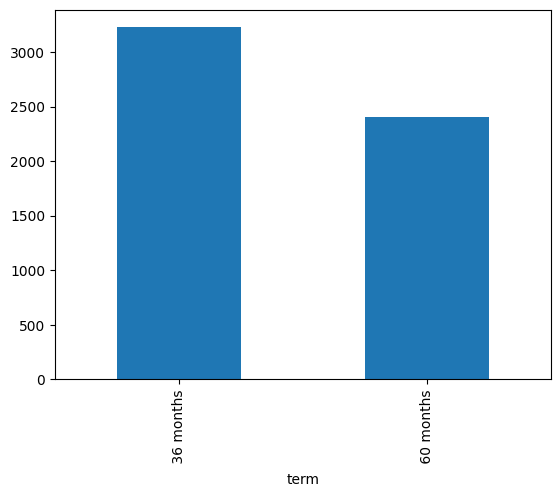

In [22]:
defaulted.term.value_counts().plot.bar()

## <font color='blue'>Applicants with shorter Loan Term are more likely to default</font>
<br><br>




## Annual income influence on defaulting

<Axes: >

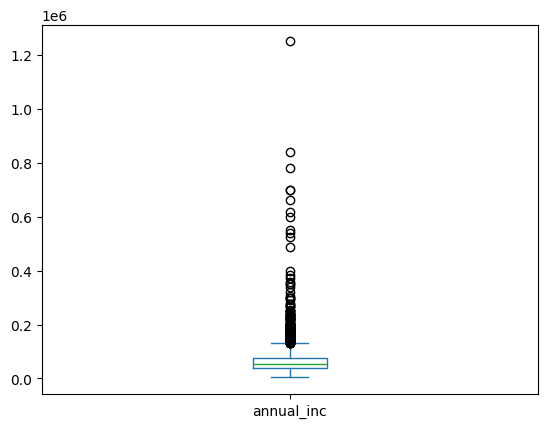

In [23]:
defaulted.annual_inc.plot.box()

<Axes: >

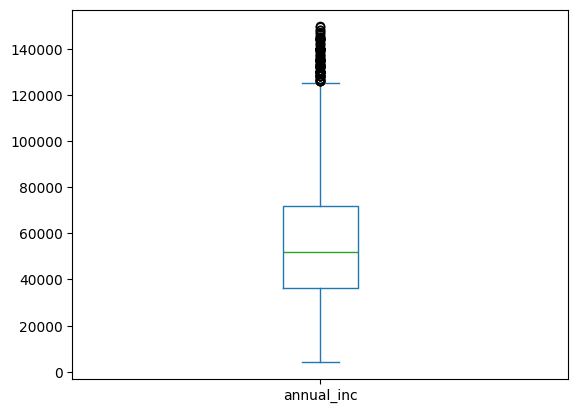

In [24]:
## truncate defaulter list to annual income < 150,000

defaulted[defaulted.annual_inc<150000].annual_inc.plot.box()

### <font color='blue'> Applicants with Annual income of less than 120,000 are more likely to default</font>
<br><br>

## DTI impact on defaulting

<Axes: >

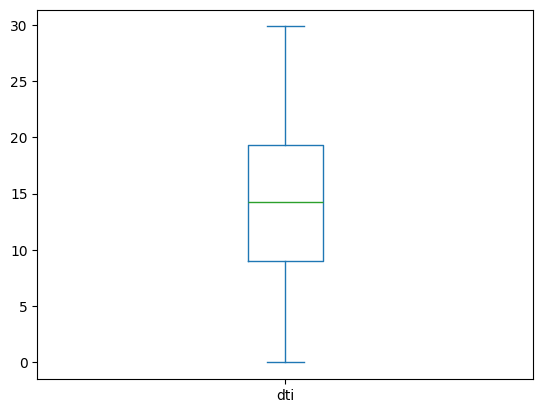

In [25]:
defaulted.dti.plot.box()

### <font color='blue'> Applicants with DTI ratio more than 10% have struggled to replay the loan most </font>
<br><br>

## State wise defaulter percentage (only states with > 500 applicants)

In [19]:
## list states
states = dataset1.addr_state.unique()

In [20]:
defaultSet = defaulted.addr_state.value_counts()

In [21]:
masterSet = dataset1.addr_state.value_counts()

In [22]:
## consider states with more than 500 applicants

masterSet = masterSet[masterSet>500]

In [23]:
stateSeries = masterSet.keys().to_series()

In [24]:
stateSeries.count()

20

In [25]:
statePerc = stateSeries.apply(lambda x: 0 if x not in defaultSet else (defaultSet[x] / masterSet[x])*100)

<Axes: xlabel='addr_state'>

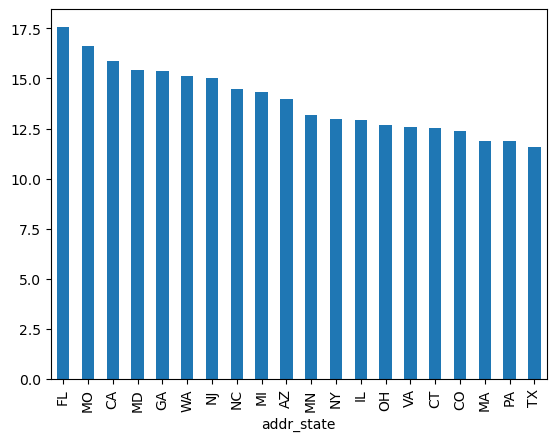

In [26]:
statePerc.sort_values(ascending=False).plot.bar()

### <font color='blue'> Applicants from state [FL, MO, CA, MD, GA, WA, NJ]	have defaulted most (15% or more)  </font>
<br><br>



## Purpose analysis (only with purposes having > 500 applications)

In [27]:
## purpose list with more than 500 applicants

purposeCount = dataset1.purpose.value_counts()[dataset1.purpose.value_counts()>500]

In [28]:
purposes = purposeCount.keys().to_series()

In [29]:
purposeSet1 = defaulted.purpose.value_counts()

In [30]:
purposeSet2 = dataset1.purpose.value_counts()

In [31]:
purposePerc = purposes.apply(lambda x: 0 if x not in purposeSet1 else (purposeSet1[x] / purposeSet2[x])*100)

<Axes: ylabel='purpose'>

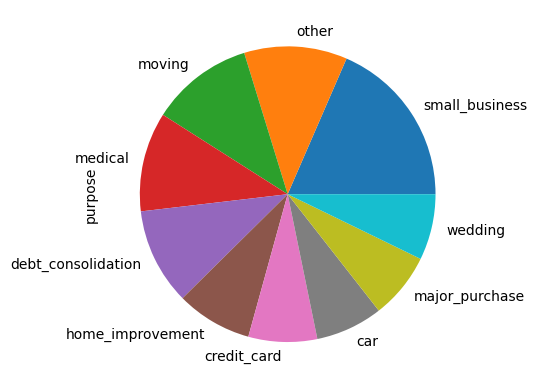

In [32]:
purposePerc.sort_values(ascending=False).plot.pie()

### <font color='blue'> Small Business & Medical Loan applicants have failed to replay most </font>
<br><br>


## Verification impact on default rate

In [33]:
set1 = dataset1.verification_status.value_counts()

In [34]:
set2 = defaulted.verification_status.value_counts()

<Axes: xlabel='home_ownership'>

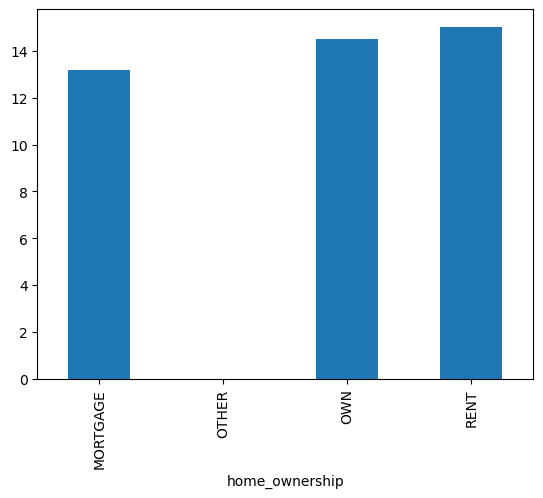

In [63]:
((set2/set1)*100).plot.bar()

### <font color='blue'>Verification Status has no impact on Defaulter rate, as verified applicants are the most who defaulted on repayment </font>
<br><br>

## Interest Rate impact on Loan defaults

In [39]:
dataset1.int_rate.value_counts().count()

371

In [40]:
defaulted.int_rate.value_counts().count()

332

In [41]:
defaulted["int_rate"] = defaulted.int_rate.apply(lambda x: float(x.replace('%', '')))

/var/folders/v6/gk985vbj5vsf80ng164m2jpr0000gn/T/ipykernel_77881/971379171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulted["int_rate"] = defaulted.int_rate.apply(lambda x: float(x.replace('%', '')))


In [42]:
dataset1["int_rate"] = dataset1.int_rate.apply(lambda x: float(x.replace('%', '')))

<Axes: >

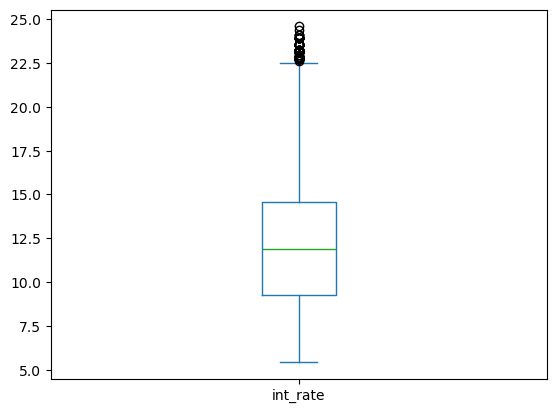

In [43]:
dataset1.int_rate.plot.box()

<Axes: >

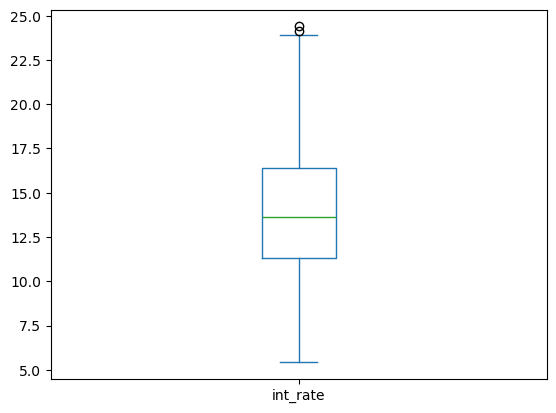

In [44]:
defaulted.int_rate.plot.box()

### <font color='blue'> Interest Rate has positive correlation with loan defaults. Applicants are more likely to default with higher interest rate. </font> <br><br>

## Grade analysis

In [45]:
set1 = dataset1.grade.value_counts()

In [46]:
set2 = defaulted.grade.value_counts()

In [47]:
grades = set1.keys().sort_values().to_series()

<Axes: xlabel='grade'>

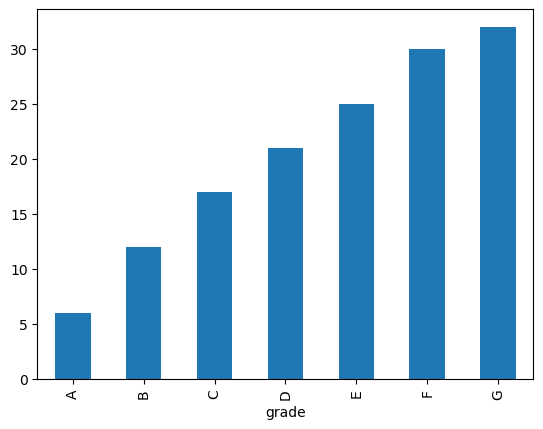

In [48]:
grades.apply(lambda x: round((set2[x]/set1[x])*100)).plot.bar()

### <font color='blue'> Grades have positive corelation with defaulter percentage. Applicants with lower grades are more likely to default. </font><br><br>

## Home Ownership analysis

In [49]:
set1 = dataset1.home_ownership.value_counts()
set1 = set1[set1>100]

In [50]:
set2 = defaulted.home_ownership.value_counts()

In [51]:
ownerships = set1.keys().sort_values().to_series()

<Axes: xlabel='home_ownership'>

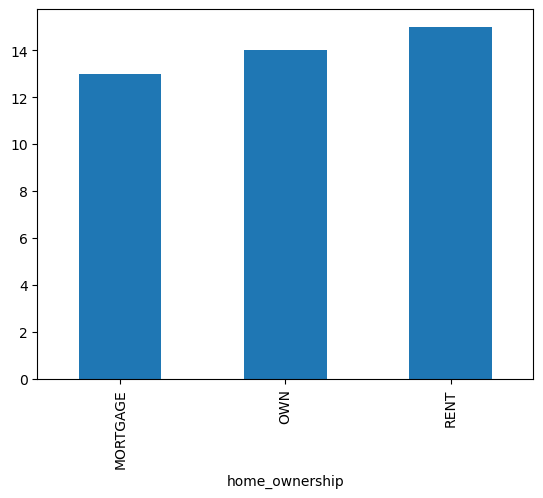

In [52]:
ownerships.apply(lambda x: round((set2[x]/set1[x])*100)).plot.bar()

### <font color='blue'>Applicants with Rented home are slightly more likely to default than applicants with Mortgaged or Own homes. </font><br><br>

In [53]:
numerical_vars = ['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',  'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc',  'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt']

In [54]:
categorical_vars = ['term', 'grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'title', 
        'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'application_type']

## Numerical columns distribution analysis

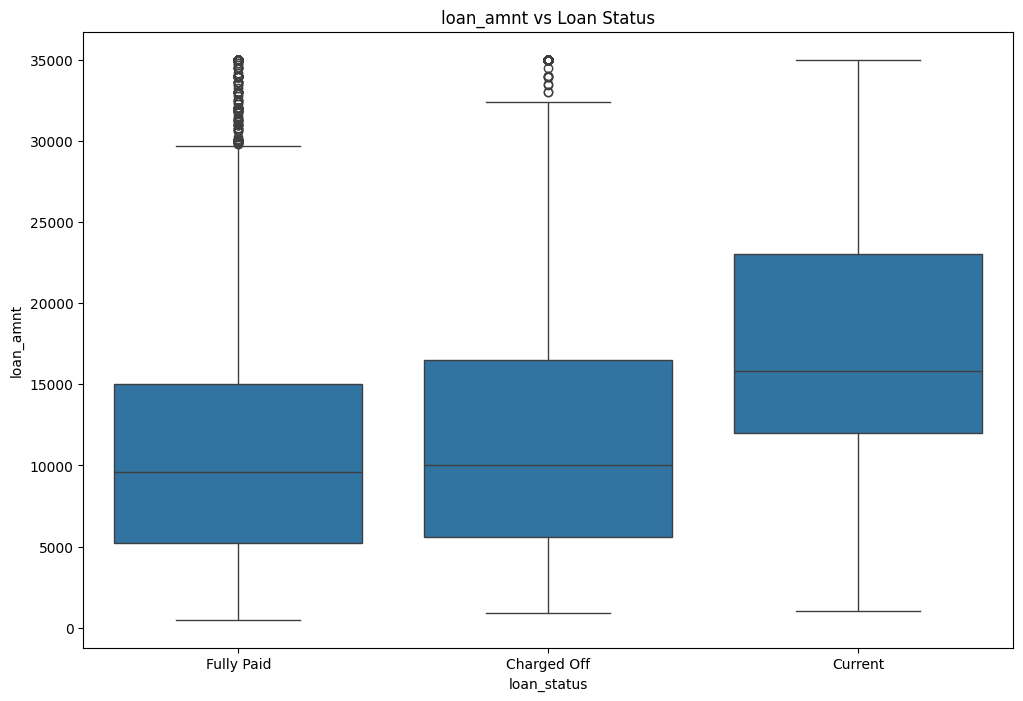

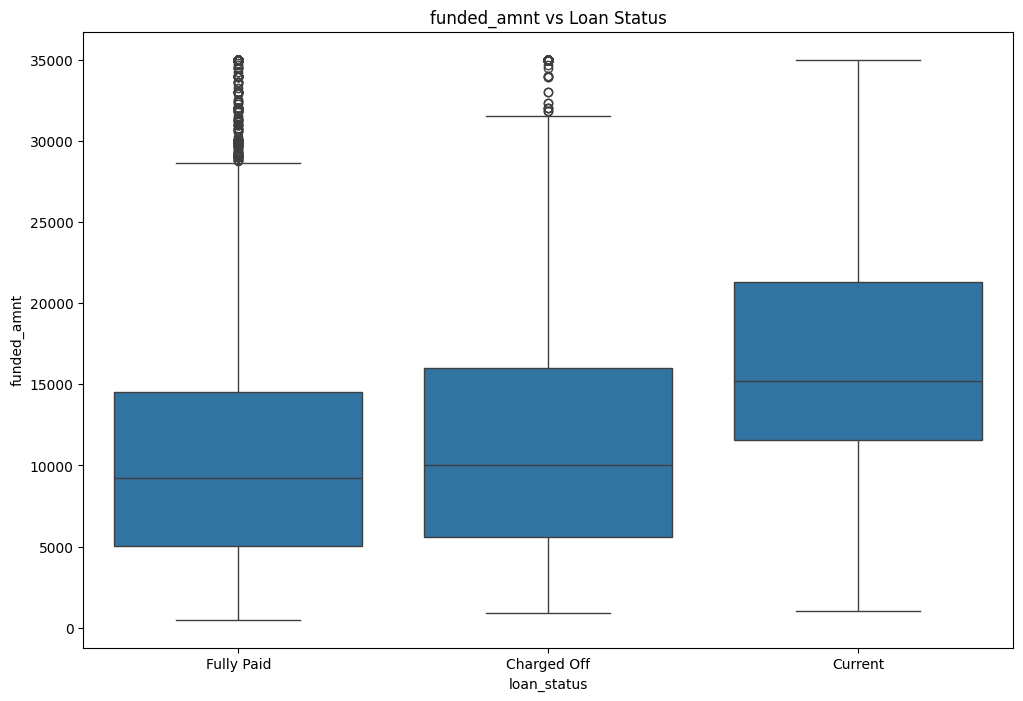

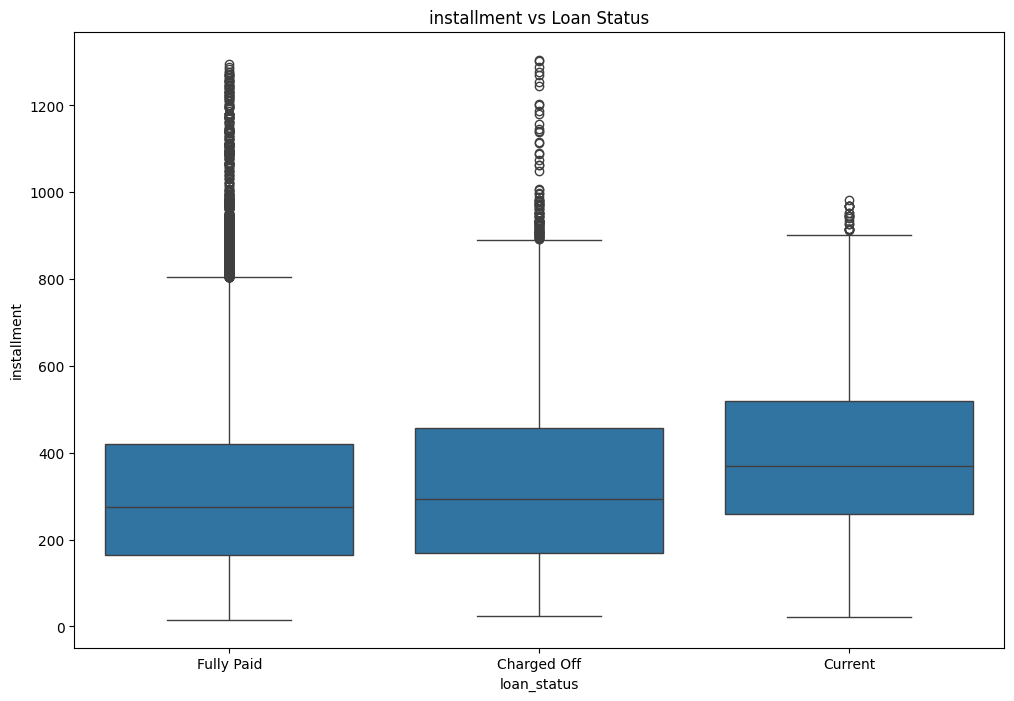

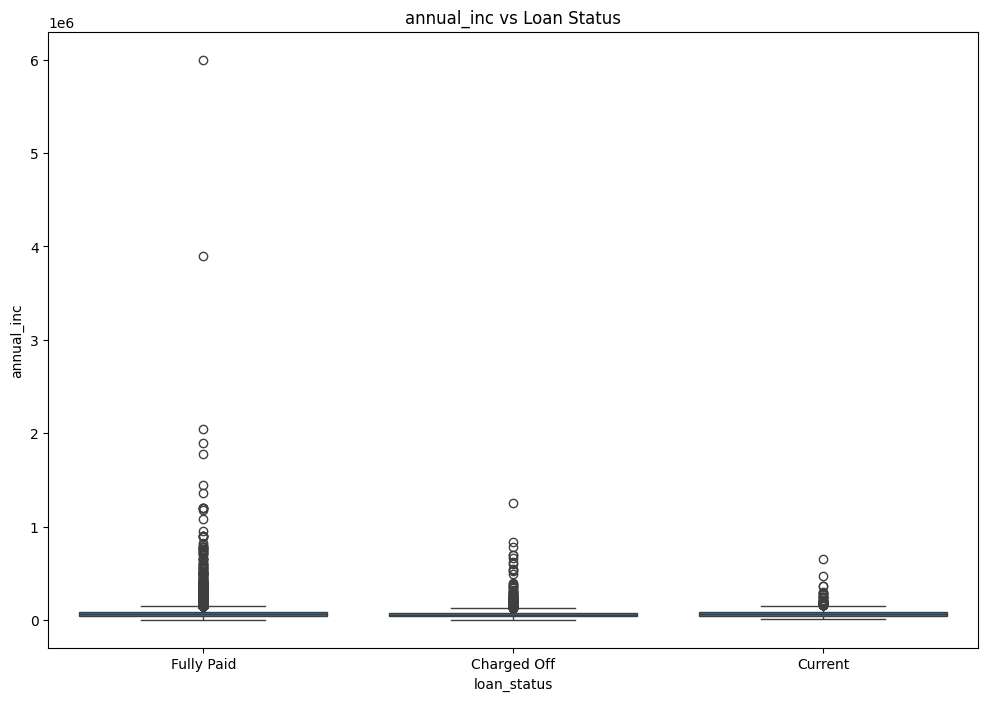

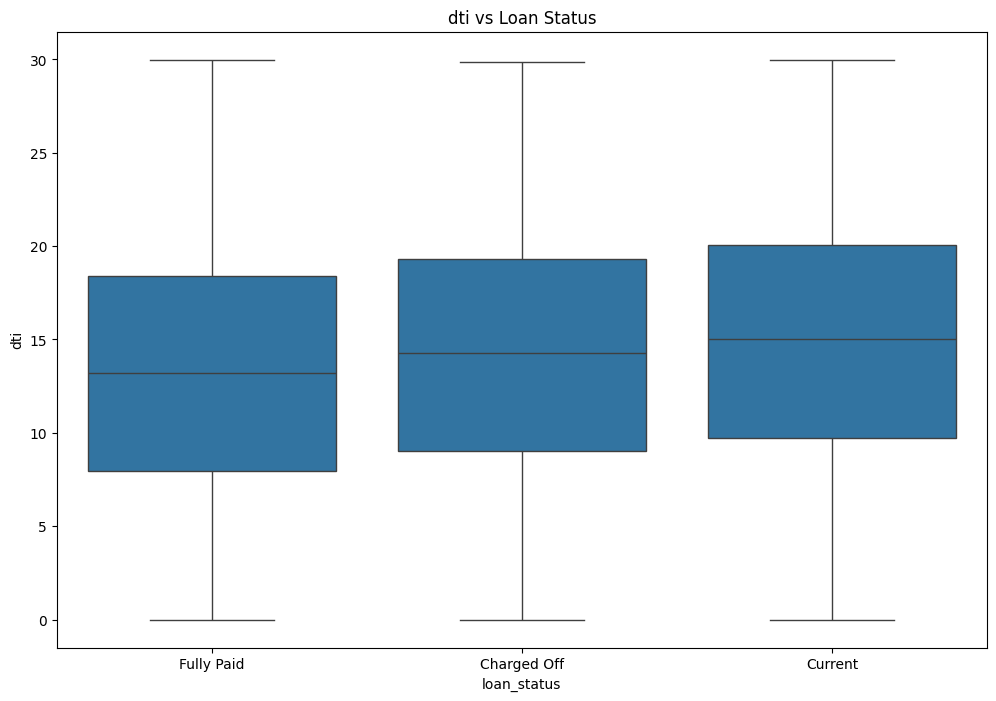

In [34]:
## Box plot numerical columns for different loan statuses

for col in ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc', 'dti']:
    plt.figure(figsize=(12,8))
    sn.boxplot(x = dataset1["loan_status"], y = dataset1[col])
    plt.title(f'{col} vs Loan Status')
    plt.show()
    

### Categorical columns distribution analysis

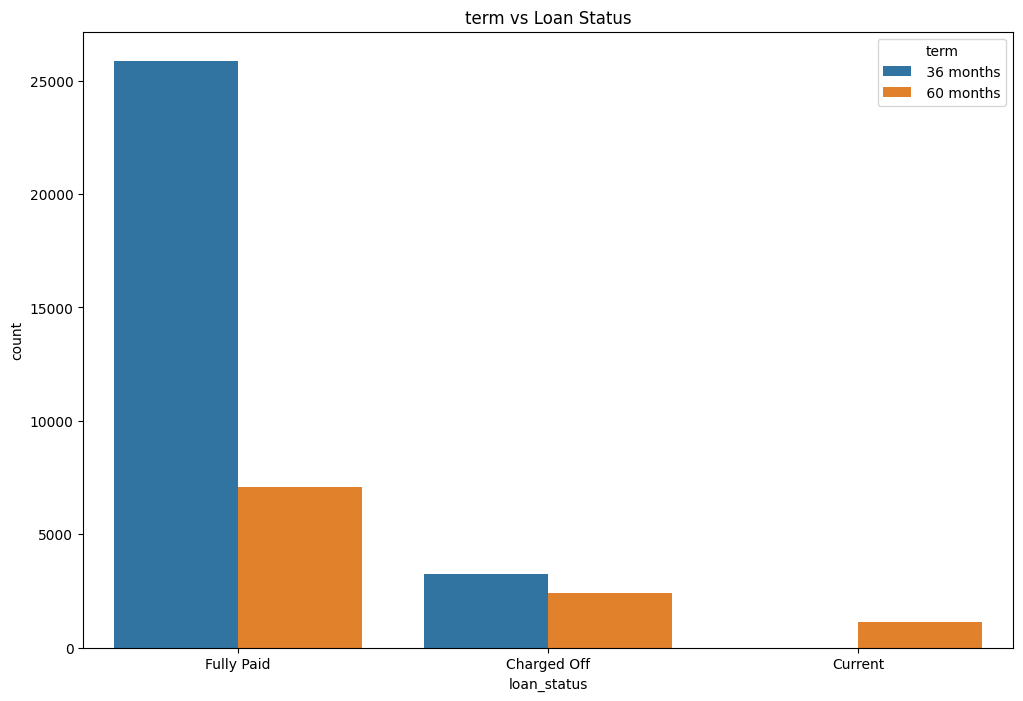

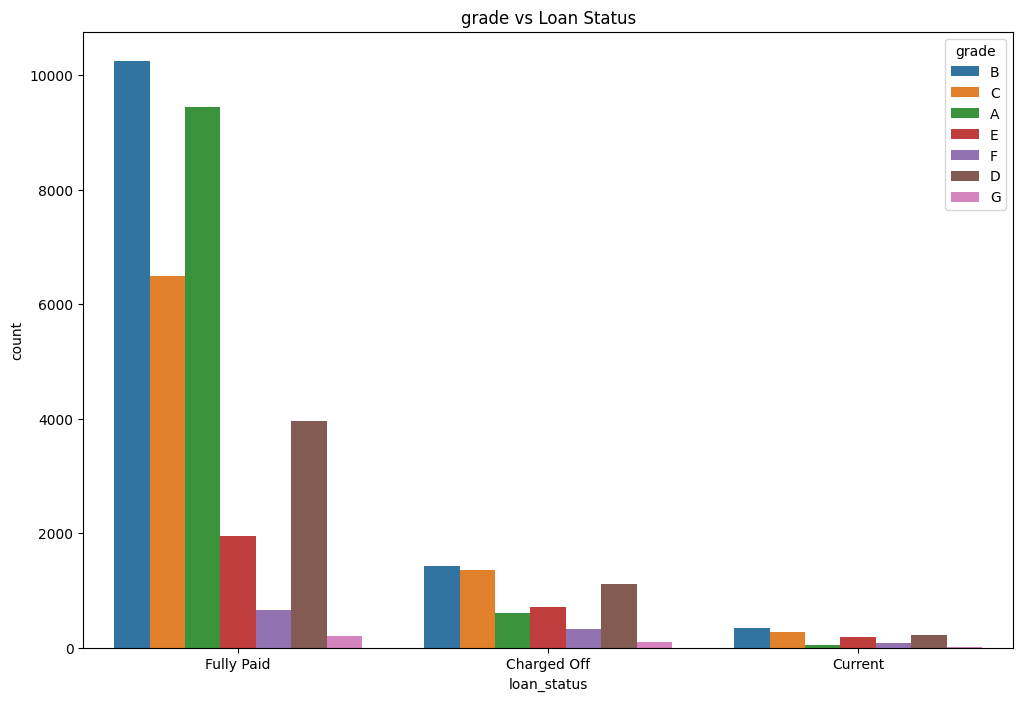

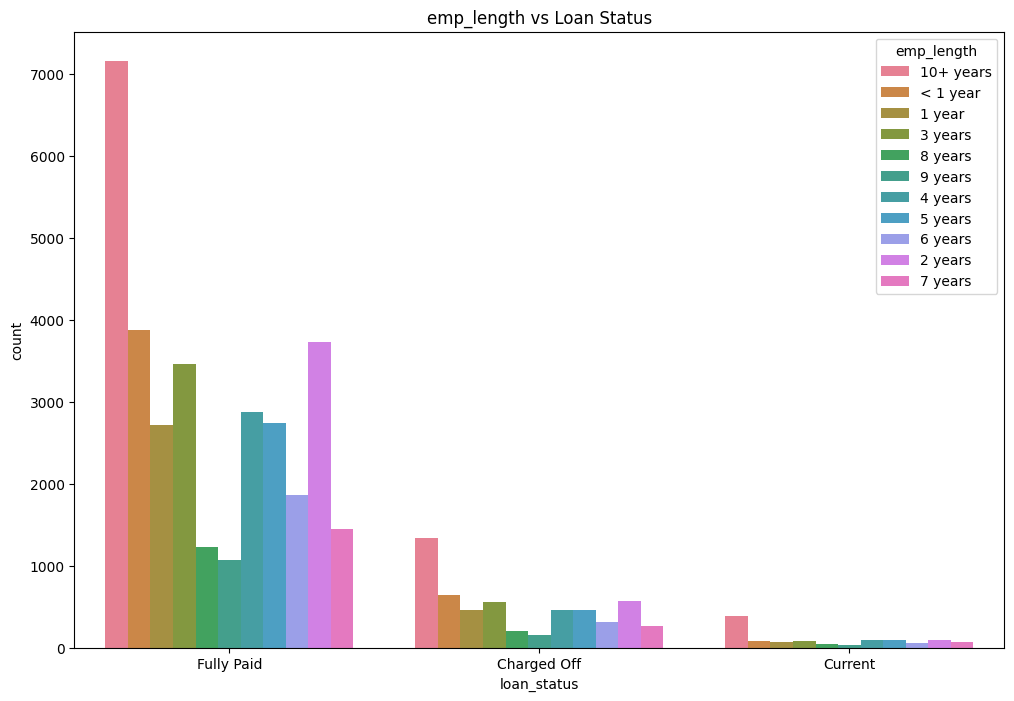

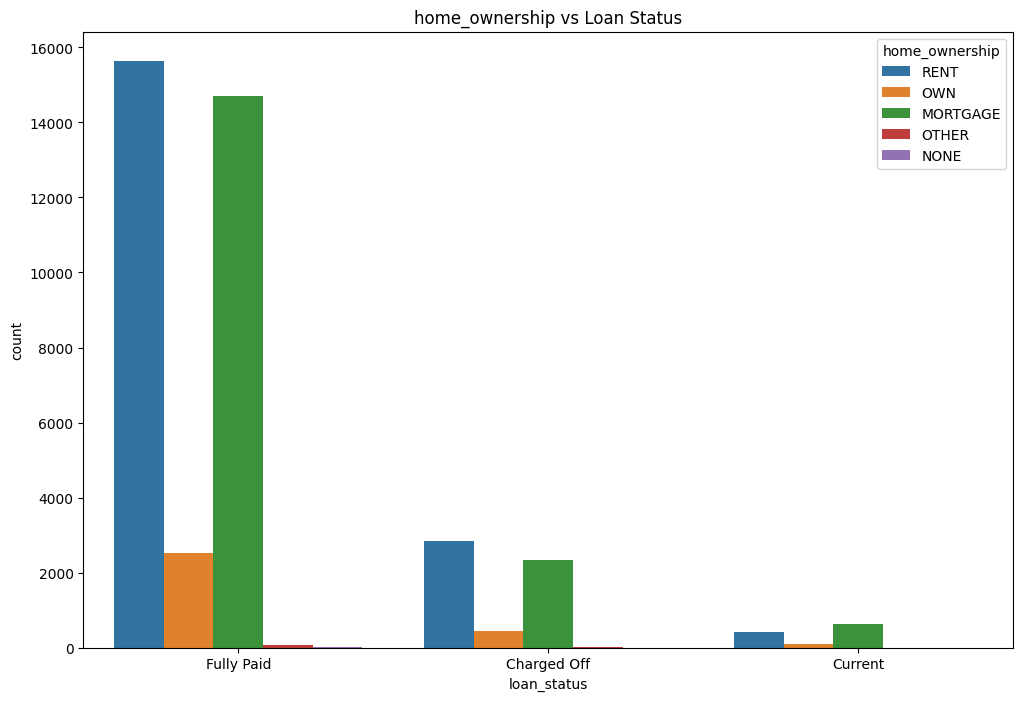

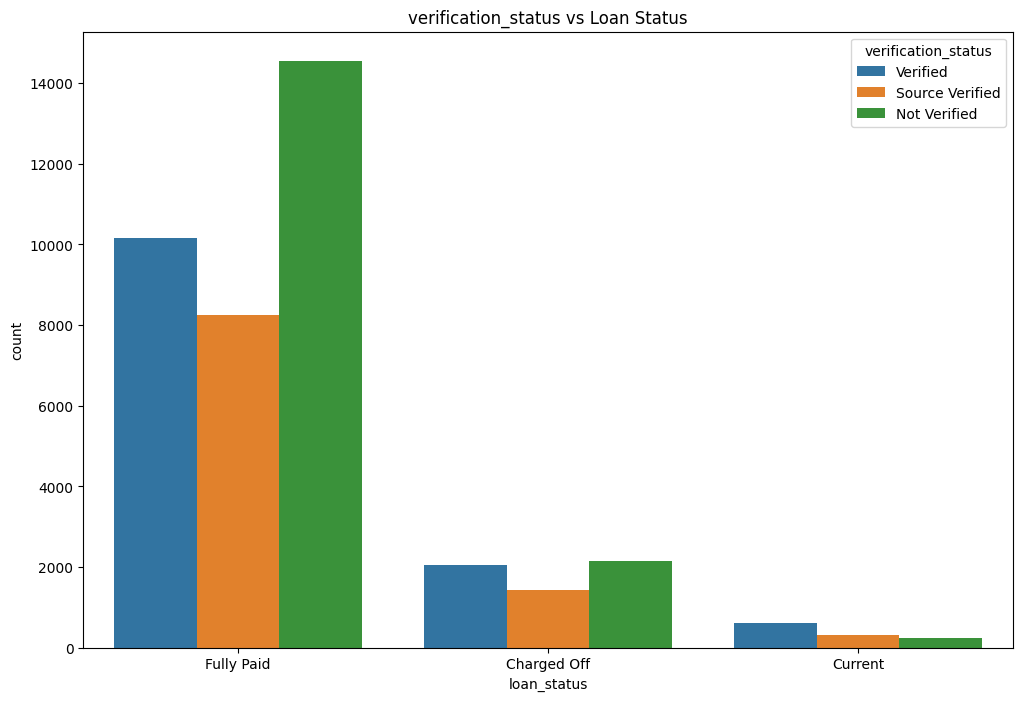

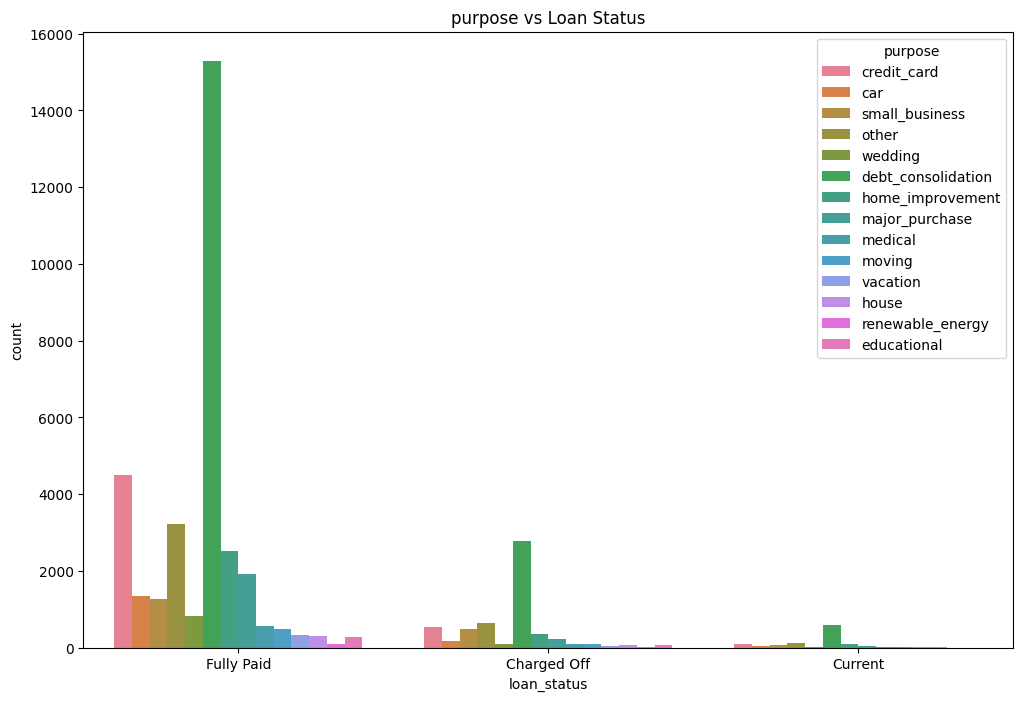

In [32]:
for var in ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose']:
    plt.figure(figsize=(12, 8))
    sn.countplot(x=dataset1['loan_status'], hue=dataset1[var])
    plt.title(f'{var} vs Loan Status')
    plt.show()

<br><br>
## Multivariate Analysis

<Axes: >

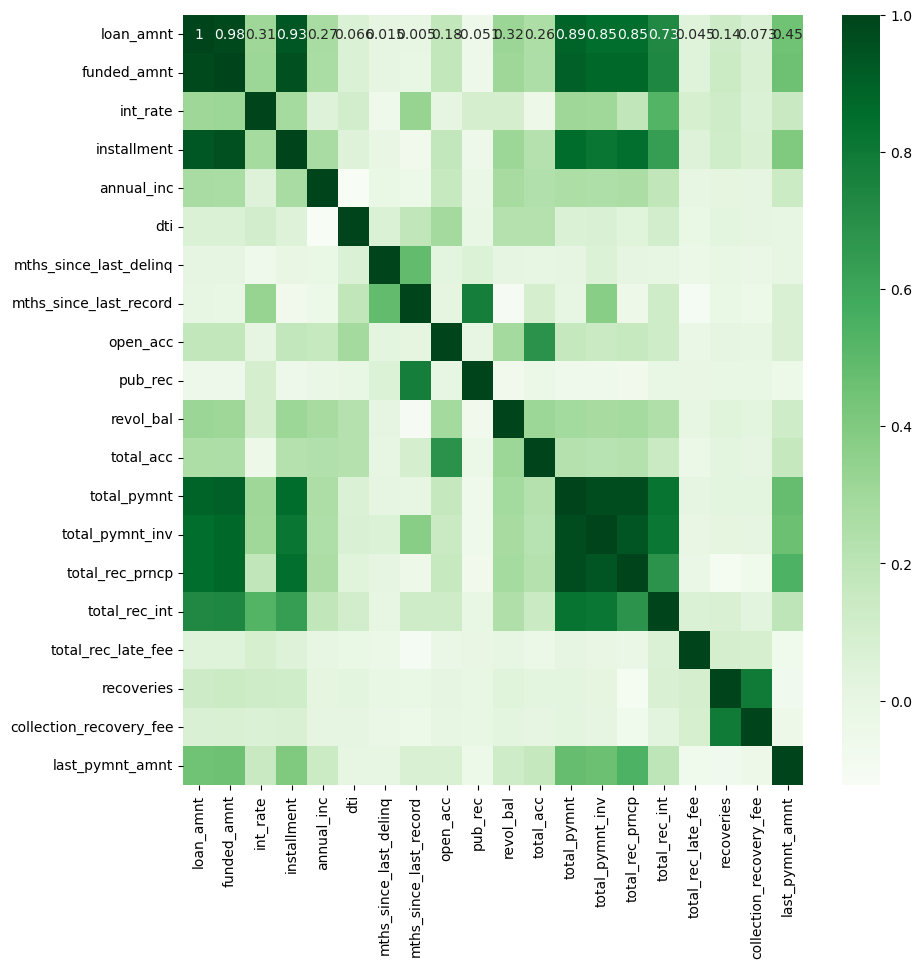

In [62]:
## Plot Heat map for correlation matrix
corr = dataset1[['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',  'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc',  'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt']].corr()

plt.figure(figsize=(10, 10))
sn.heatmap(corr, cmap = "Greens", annot=True)